<img src="https://designguide.ku.dk/download/co-branding/ku_logo_uk_h.png" alt="University logo" width="300" align="right"/>

## Language Processing 1

### Session 10

##### Manex Agirrezabal

### In the previous classes

We learned about:

  * One-hot representations
  * TF-IDF vectorization

### In this class:

I would like you to learn about:

  * Intuition of vector semantics
  * Word embeddings
  * Word2vec, Glove and FastText models

### Vector semantics

- Word2Vec
  + CBOW
  + Skip-gram
- Glove
  + Co-Occurrence matrix
- FastText
  + Subword units

## Word2vec

When we use word2vec, one word gets one vector. E.g.:

`my_dictionary['house'] = [0.1 0.223 0.12 0.4 1.2 2.1 ... -0.9]`

`my_dictionary['bank'] = [0.6 0.153 0.9 0.1 -0.2 1.2 ... 0.19]`


### CBOW (Continuous Bag-Of-Words)

This method tries to predict a word (the focus word) given a context.

### Skip-gram

In this method, the context words are predicted given the focus word.

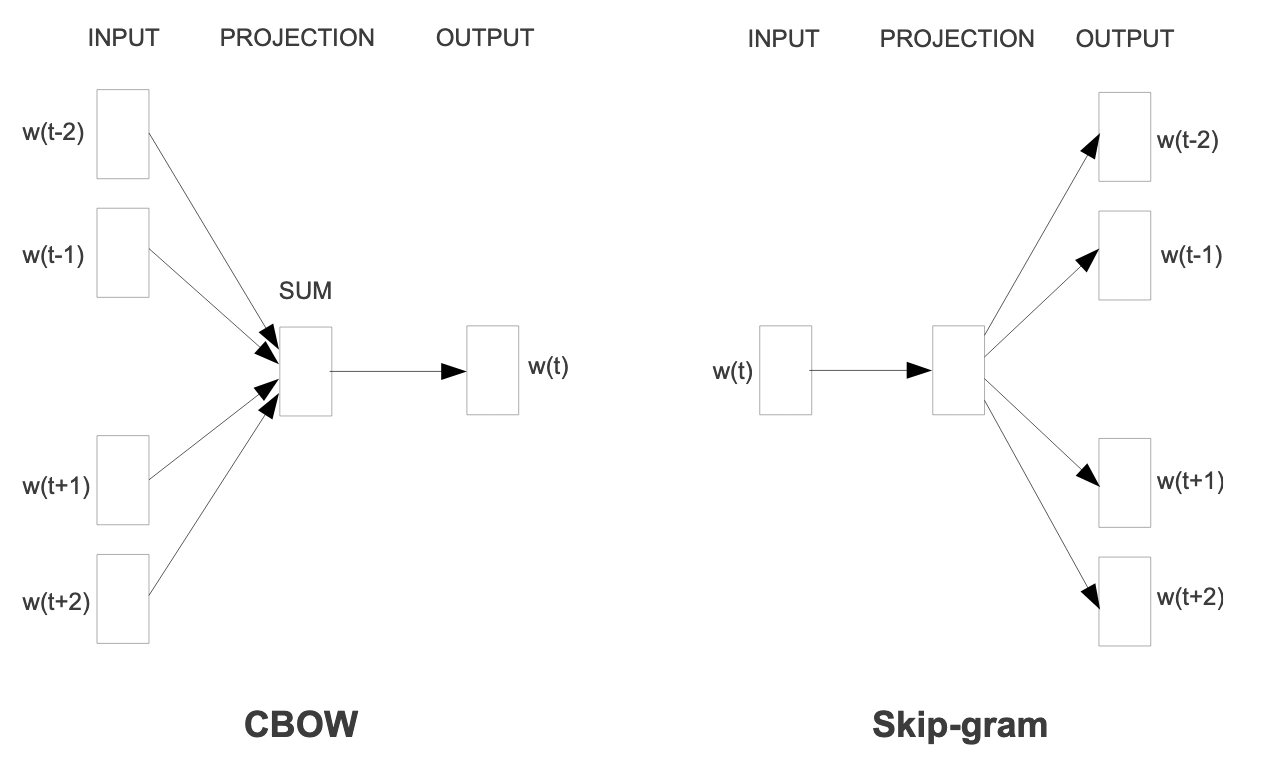

When we train a word2vec model, we can set a number of parameters. 

### Window size in word2vec

 - Smaller window sizes: we capture structural properties of words

 - Larger window sizes: we capture more topic related properties

### Short version: How to learn word2vec (skip-gram) embeddings

Start with V random 300-dimensional vectors as initial embeddings

Use logistic regression, the second most basic classifier used in machine learning after naïve bayes

 * Take a corpus and take pairs of words that co-occur as positive examples
 * Take pairs of words that don't co-occur as negative examples
 * Train the classifier to distinguish these by slowly adjusting all the embeddings to improve the classifier performance
 * Throw away the classifier code and keep the embeddings


## Glove

In this case, for each word we also get a vector, just like with word2vec.

The difference is that we do not compute the word embeddings in the same way.

First they create a word-context (word-word) matrix, in which they count how often two words appear in the same context.

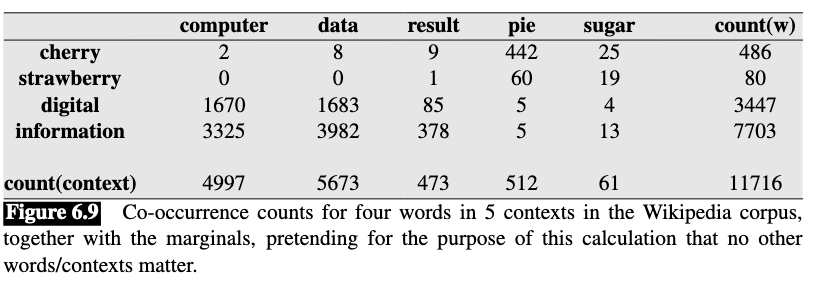

This matrix is usually very big. Around 50,000 x 50,000, maybe.

They factorize the matrix, meaning that they reduce the size of the matrix. In this way, they compress the size of the matrix, and each of these vectors (rows) still keeps a similar amount of information.

## FastText

 - Previous techniques represent each word of the vocabulary by a distinct vector
 
 - They ignore the internal structure of words
 
 - Turkish, Finnish, Basque?


#### Basque language:

 * etxe (house):
   * etxea (the house)
   * etxeko (of the house)
   * etxetik (from the house)
   * etxera (to the house)
   * ...
 
#### Spanish language:


 * tolerar (to tolerate):
   * tolero (I tolerate)
   * toleras (you (sg) tolerate)
   * tolera (he/she tolerates)
   * toleramos (we tolerate)
   * tolerais (you (pl) tolerate)
   * toleran (they tolerate)
   * ...

Because many word formations follow rules, it is possible to improve vector representations for morphologically rich languages by using character level information.

### FastText (Bojanowski et al.., 2017)

 - Extension of skipgram (Mikolov et al., 2013)

 - Learn representations for subword units, or character n-grams, and to represent words as the sum of the n-gram vectors.

For example, if we want to build an n-gram representation for the word `where` with $n=3$.

`<wh, whe, her, ere, re>`

Note how they add word boundaries so that the model can get clues about which are prefixes and suffixes.

In practice, when given a word, they extract all subwords with $3 <= n <= 6$.

and the word itself, for example, `<where>`

### Does the model actually work?

#### Word similarity

 * Task of predicting word similarity
 
 * Calculate Spearman correlation between
   * human judgement (WS353, and simiilar datasets)[1]
   * cosine distance from different embeddings 
 * Higher correlation implies better enbeddings

(From Bojanowski et al. (2017))

...we notice that the proposed model, which uses subword information, outperforms the baselines on all datasets except the English WS353 dataset.

[1] http://alfonseca.org/eng/research/wordsim353.html 

#### (more on) word similarity

...The effect of using character n-grams is more important for Arabic, German and Russian, than for English, French or Spanish.

...many German words are compound words; for instance the nominal phrase “table tennis” is written in a single word as “Tischtennis”. By exploiting the character-level similarities between “Tischtennis” and “Tennis”, our model does not represent the two words as completely different words.

#### Word analogy

 * Queen is to Woman what King is to _
 * Berlin is to Germany what Paris is to _
 * tall is to taller what fast is to _
 * mice is to mouse what feet is to _

Evaluated for English, Czech, German and Italian


 * morphological information significantly improves the syntactic tasks
 * our approach outperforms the baselines.
 
 But,
 
 * it does not help for semantic questions, and even
 * degrades the performance for German and Italian

### Conclusion

  * Simple method to learn word representations by taking into account subword information
  * Incorporates character n-grams into the skipgram model
  * The model trains fast and does not require any preprocessing or supervision

Further reading:

  * https://aclanthology.org/Q17-1010.pdf
  * https://aclanthology.org/E17-2068.pdf